This notebook aims to resolve the problem of another challenge held by Shopee Code League, Sentiment Analysis. To prevent any disrespectful actions by sharing the dataset to public, I prefer to take it from my Google Drive which I have been saved the dataset inside there. Further action I do is mounting my Drive with Google Colab.

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

As usual, I import all required libraries before exploring and processing the data further. Here I import pandas and numpy as the fundamental libraries, followed by re to make use of regular expression, string to manage string value, and last, nltk to do preprocessing method to the dataset.

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Shopee/Sentiment Analysis/train.csv") 
df.head()# print out first 5 data from the data after reading it

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


In [ ]:
df.set_index("review_id",inplace=True) #set review_id as index and replace the column automatically

In [ ]:
df.head() 

,review,rating
review_id,,
0,Ga disappointed neat products .. Meletot Hilsn...,1
1,"Rdtanya replace broken glass, broken chargernya",1
2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,Sent a light blue suit goods ga want a refund,1
4,Pendants came with dents and scratches on its ...,1


In [ ]:
df.shape # to check the dimension of the dataset, it contains 146811 rows and 2 columns

(146811, 2)

Now, we are going to count the number of words, character, and punctuation for each review to do few analysis on it. Well, after applying some calculation on it, I don't really get any insights from it, so let's take a look on another analysis by counting the most frequent words appeared on the overall review

In [ ]:
punc=string.punctuation
df['wc']=df['review'].apply(lambda x:len(x.split(" ")))
df['cc']=df['review'].apply(lambda x:len(x.replace(" ","")))
df['pc']=df['review'].apply(lambda x:len([a for a in x if a in punc]))

df.tail()

,review,rating,wc,cc,pc
review_id,,,,,
146806,Excellent product quality delivery speed is ve...,5,13,68,2
146807,thanks gan,5,2,9,0
146808,Awesome awesome quality merchandise value CP ...,5,10,49,1
146809,Nice Packing boxes made effective price .........,5,10,60,14
146810,Excellent product quality excellent product p...,5,12,67,0


In [ ]:
from collections import Counter
text=" ".join(df['review'].values)
counter=Counter(text.split(" "))
counter.most_common(50) # to show 50 most frequent words appeared on the reviews, excluding any auxiliary and 'article', we see that word 'good' top the reviews

[('the', 57450),
 ('is', 53804),
 ('', 50580),
 ('good', 46559),
 ('quality', 42327),
 ('product', 41817),
 ('very', 35464),
 ('to', 27107),
 ('The', 26660),
 ('of', 24772),
 ('delivery', 23237),
 ('and', 22888),
 ('Good', 21018),
 ('not', 20735),
 ('a', 18827),
 ('price', 18470),
 ('speed', 18386),
 ('..', 16315),
 ('seller', 15457),
 ('I', 15014),
 ('but', 14281),
 ('for', 13962),
 ('in', 13853),
 ('goods', 13521),
 ('...', 13358),
 ('good.', 12752),
 ('awesome', 12173),
 ('value', 11531),
 ('Excellent', 10959),
 ('fast', 10130),
 ('it', 9824),
 ('Product', 9183),
 ('order', 8367),
 ('Very', 8242),
 ('with', 8091),
 ('you', 8068),
 ('that', 8044),
 ('Delivery', 7534),
 ('response', 7507),
 ('service', 7359),
 ('nice', 7279),
 ('Fast', 7113),
 ('was', 7099),
 ('also', 6744),
 ('other', 6561),
 ('Awesome', 6373),
 ('original', 6246),
 ('Thank', 6060),
 ('this', 5806),
 ('like', 5738)]

To make a closer look on the collection of words inside the reviews, let's generate the word cloud to see them by excluding all the stopwords (meaningless words). We can see that most of the words show a good impression, such as good, awesome.

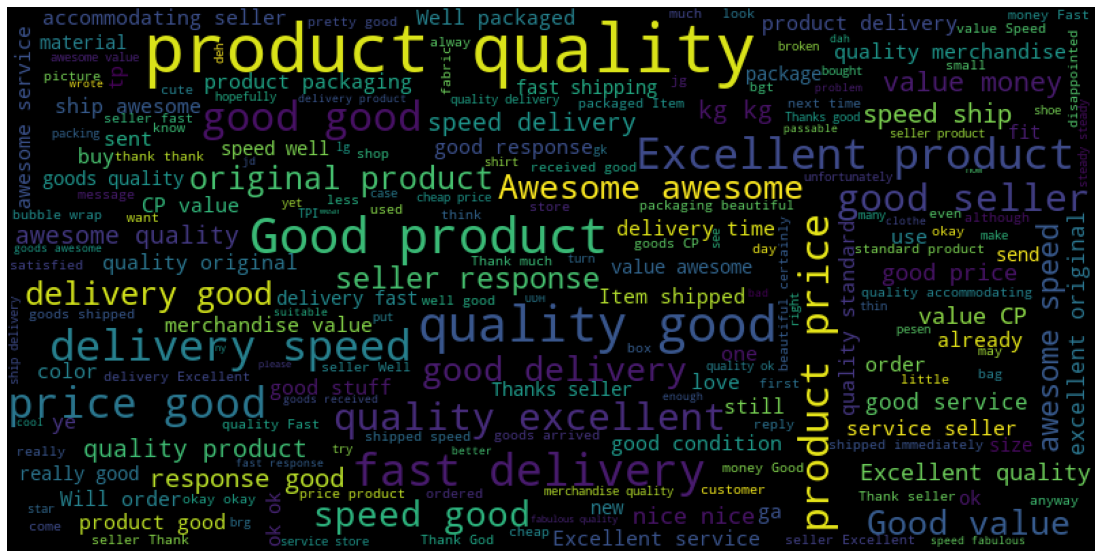

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords=set(STOPWORDS)

wordcloud=WordCloud(max_font_size=50, background_color="black",
                    stopwords=stopwords,width=800, height=400).generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.tokenize import WordPunctTokenizer # to tokenize the sentences
from nltk.corpus import stopwords # to generate the collection of stopwords

In [ ]:
tok=WordPunctTokenizer()
p1=r'\d+' # regex for digits/numbers, eg: 1,23
p2=r'[^\w\s_]' # regex for all punctuations, eg: . , ?
p3=r'[…''""]' # regex for any other punctuations
p4=r'\[.*?\]' # regex for square bracket and words inside it, eg: [hello]
p5=r'\w*\d\w*' # regex for username-like words, eg:hai098love
pola=r'|'.join((p1,p2,p3,p4,p5)) 
stop_words=set(stopwords.words("english"))

Next step is cleaning the dataset, specifically the review sentences. So, first we are going to remove all pattern associated with all regex we have created before. Then, we change it into lower case and do a tokenization. Last, we get rid of all stopwords and save all the 'clean' sentences into the provided list. The dataframe df is applied to this cleaning function and replace the review with the list.

In [ ]:
def cleaner(df):
  clean=[]
  for index,row in df.iterrows():
    stripped=re.sub(pola,'',row.review)
    lower_case=stripped.lower()
    words=tok.tokenize(lower_case)
    filter=[w for w in words if not w in stop_words]
    clean.append((" ".join(filter)).strip())

  # print("Done!")
  return clean

In [ ]:
train_list=cleaner(df)
df.review=pd.DataFrame(train_list)
# train_list

Next up we apply the previous 'cleaned' dataframe to the following function to do a lemmatization and stemming. This function is used to change each of the word in the review into its root word (and also remove all the prefix-suffixes attached to it)

In [ ]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

def cleaner_two(df):
  final=[]
  for index,row in df.iterrows():
    words=tok.tokenize(row.review)
    stemming=[stemmer.stem(w) for w in words if not w in stop_words]
    lemmatizing=[lemmatizer.lemmatize(w) for w in stemming if not w in stop_words]
    final.append((" ".join(lemmatizing)).strip())
  
  return final

In [ ]:
# final_list=cleaner_two(df)
# df.review=pd.DataFrame(final_list)

Now we are going to do feature extraction on our dataframe. In this challenge, I choose TF-IDF vectorizer because it generates higher and better result in the modelling later. For the maximum features, I set it into 1000 first most frequent words in the overall reviews. After that, we are modelling our data training using Logistic Regression followed by fitting the data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=1000)
X_tfidf=vectorizer.fit_transform(df.review)

In [ ]:
from sklearn.linear_model import LogisticRegression
y_train=df.rating
clf=LogisticRegression()
clf.fit(X_tfidf,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We finish our cleaning and data modelling in the train dataset. Now, we will apply and perform the same action to the test set, including cleaning data and performing feature extraction.

In [ ]:
test=pd.read_csv("/content/drive/My Drive/Shopee/Sentiment Analysis/test.csv")
test.head()

,review_id,review
0,1,"Great danger, cool, motif and cantik2 jg model..."
1,2,One of the shades don't fit well
2,3,Very comfortable
3,4,Fast delivery. Product expiry is on Dec 2022. ...
4,5,it's sooooo cute! i like playing with the glit...


In [ ]:
from collections import Counter
text=" ".join(test['review'].values)
counter=Counter(text.split(" "))
counter.most_common(50)

[('the', 28223),
 ('and', 19041),
 ('.', 18291),
 ('is', 17398),
 ('to', 14478),
 ('good', 14397),
 ('I', 13950),
 ('very', 13835),
 ('a', 12773),
 ('of', 9843),
 ('for', 8916),
 ('product', 7457),
 ('in', 7390),
 ('quality', 7346),
 ('The', 6993),
 ('not', 6939),
 ('but', 6089),
 ('..', 5970),
 ('are', 5846),
 ('shoes', 5657),
 ('it', 5432),
 ('...', 5411),
 ('delivery', 4947),
 ('comfortable', 4900),
 ('with', 4845),
 ('price', 4832),
 ('my', 4699),
 ('seller', 4624),
 ('that', 4159),
 ('fast', 4147),
 ('Good', 4112),
 ('you', 4057),
 ('was', 3856),
 ('have', 3817),
 ('this', 3745),
 ('fit', 3718),
 ('goods', 3684),
 ('as', 3576),
 ('Very', 3565),
 ('like', 3551),
 ('shoe', 3439),
 ('order', 3371),
 ('also', 3365),
 ('on', 3273),
 ('they', 3202),
 ('so', 3172),
 ('great', 3148),
 ('other', 3124),
 ('nice', 2995),
 ('be', 2888)]

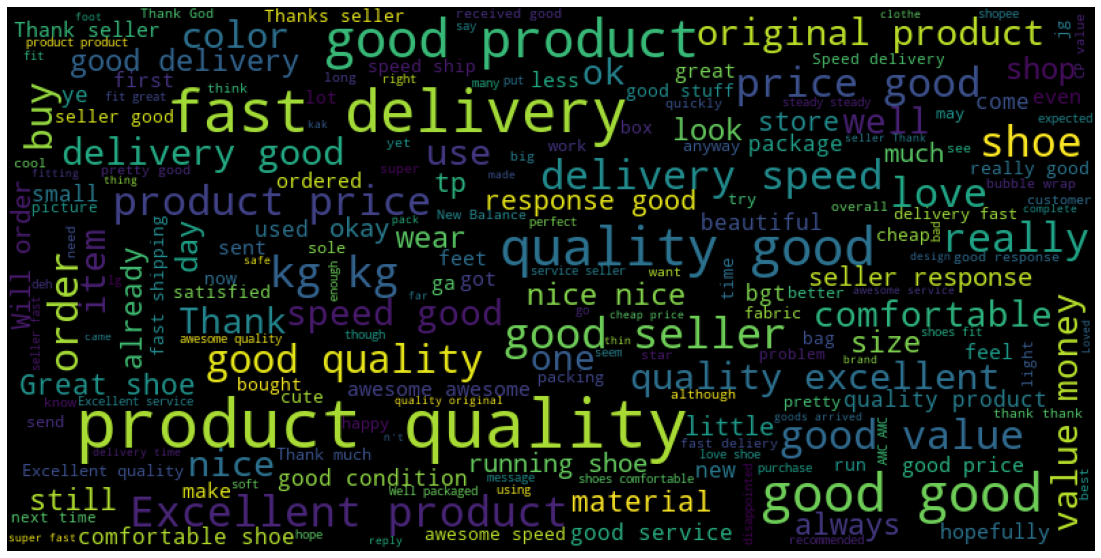

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords=set(STOPWORDS)

wordcloud=WordCloud(max_font_size=50, background_color="black",
                    stopwords=stopwords,width=800, height=400).generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
test_list=cleaner(test)
test.review=pd.DataFrame(test_list)
# train_list

In [ ]:
# final_test=cleaner_two(test)
# test.review=pd.DataFrame(final_test)

In [ ]:
test

,review_id,review
0,1,great danger cool motif jg models delivery cep...
1,2,one shades dont fit well
2,3,comfortable
3,4,fast delivery product expiry dec product wrap ...
4,5,sooooo cute like playing glitters better brows...
...,...,...
60422,60423,product succesfully ordered shipped quickly ge...
60423,60424,opening time little scared fear dalemnya destr...
60424,60425,product quality excellent original product pro...
60425,60426,holding really well also


In [ ]:
X_tfidf_test=vectorizer.transform(test.review)
prediction=clf.predict(X_tfidf_test) #make prediction on our data test (the data test has been vectorized) based on the model we have built before
prediction

array([3, 3, 5, ..., 5, 5, 4])

In [ ]:
test['rating']=prediction
test

,review_id,review,rating
0,1,great danger cool motif jg models delivery cep...,3
1,2,one shades dont fit well,3
2,3,comfortable,5
3,4,fast delivery product expiry dec product wrap ...,5
4,5,sooooo cute like playing glitters better brows...,4
...,...,...,...
60422,60423,product succesfully ordered shipped quickly ge...,3
60423,60424,opening time little scared fear dalemnya destr...,3
60424,60425,product quality excellent original product pro...,5
60425,60426,holding really well also,5


In [ ]:
submit=test[['review_id','rating']]

In [ ]:
submit.to_csv("submit2.csv",index=False)